<b>Name: Aman Kumar</b> <br>
<b>Hawk Id: A20538809</b> <br>
<b>CS 512 (Computer Vision)</b> <br>
<b>Fall'24</b>

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# Problem 1
<b>Add Gaussian Noise and Compute SNR</b><br>
<b>Task: </b>Load a grayscale image and generate 10 noisy versions by adding Gaussian noise with
a fixed standard deviation and zero mean. Compute the noise variance by calculating the pixel-wise standard deviation across the 10 noisy images (without directly accessing the noise itself). Compute the signal power as the variance (square of the standard deviation) of the original grayscale image. Finally, calculate the SNR in dB using the ratio of the signal power to the noise power.

Noise power as the mean of the noise variance is: 354.7992858886719
Signal power as the variance of the original image is: 2981.994873046875
SNR in decibels (dB) is: 9.245241284370422 dB


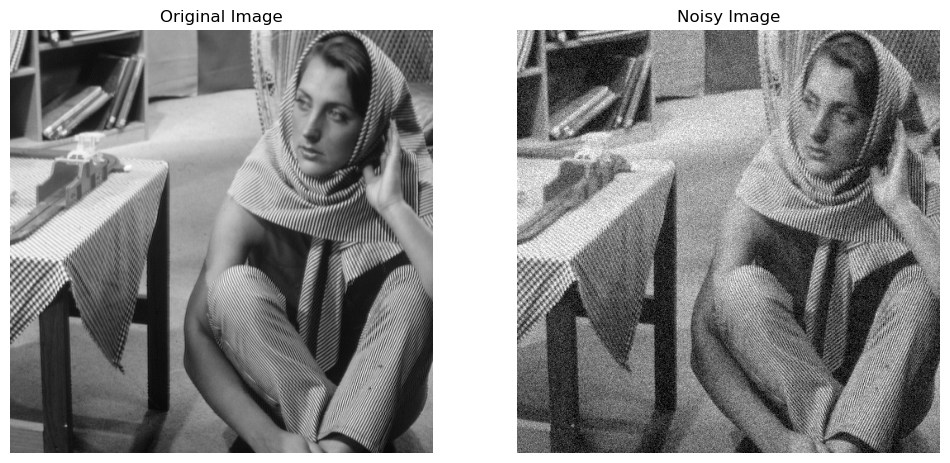

In [30]:
#Problem 1 below:-

# Load the image and convert to grayscale
image = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)

image = image.astype(np.float32)  # Convert to float for precise calculations

# Parameters for Gaussian noise
std_dev = 20  # Standard deviation for Gaussian noise
mean = 0      # Mean of the Gaussian noise
num_noisy_images = 10  # Number of noisy images to generate

# Generate 10 noisy versions of the grayscale image
noisy_images = []
for i in range(num_noisy_images):
    noise = np.random.normal(mean, std_dev, image.shape).astype(np.float32)
    noisy_image = np.clip(image + noise, 0, 255)  # Clip values to be in valid range
    noisy_images.append(noisy_image)

# Compute the noise power as the mean of the noise variance
noise_variance = np.var(noisy_images, axis=0)
noise_power = np.mean(noise_variance)
print(f"Noise power as the mean of the noise variance is: {noise_power}")

# Compute the signal power as the variance of the original image
signal_power = np.var(image)
print(f"Signal power as the variance of the original image is: {signal_power}")

# Compute the SNR in decibels (dB)
snr_in_db = 10 * np.log10(signal_power / noise_power)
print(f"SNR in decibels (dB) is: {snr_in_db} dB")

# Display the original and the first noisy image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_images[0], cmap='gray')
plt.title("Noisy Image")
plt.axis('off')

plt.show()


# Problem 2
<b>Implement a Convolution Filter for Smoothing</b><br>
<b>Task:</b> Load a grayscale image. Implement a basic 3x3 convolution filter. Pad the image with zeros so that the convolution result has the same dimensions as the input. Define a basic
3x3 smoothing filter. Apply the filter ot a grayscale image using your function and OpenCV's function, and compare the execution time. Display the original and smoothed images. Explain the performance difference between your implementation and OpenCV's convolution.

Manual convolution time:  0.59410 seconds
OpenCV convolution time (zero padding): 0.00318 seconds


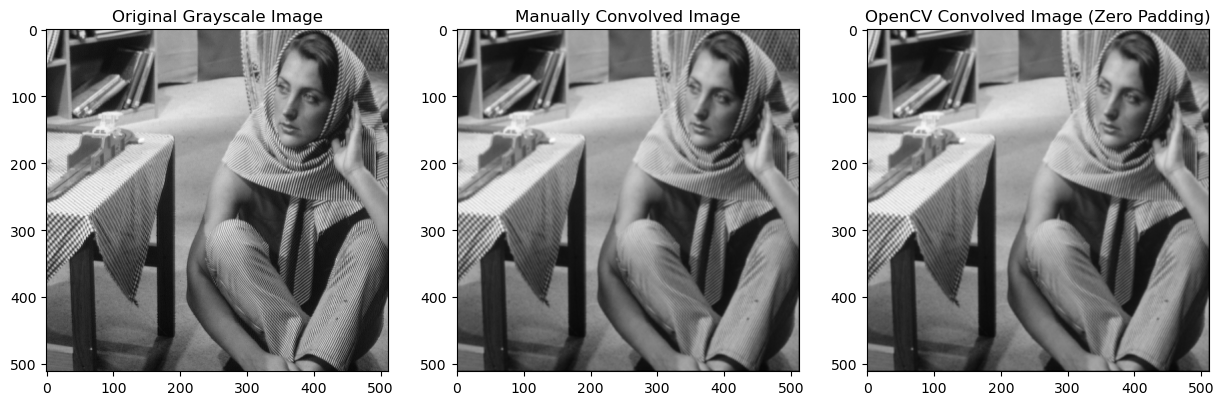

In [40]:
#Problem 2 below:-

# Function for manual convolution using zero padding
def manual_convolution (image, kernel): 
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # padding dimesnsions
    padding_height = kernel_height // 2
    padding_width = kernel_width // 2
    
    # Pad the image with zeros
    padded_image = np.pad(image, ((padding_height, padding_height), (padding_width, padding_width)), mode='constant')
    
    # Create an output image of the same size as the input image
    output_image = np.zeros_like(image)

    # Perform the convolution
    for i in range(image_height):
        for j in range(image_width):
            # Extract the region of interest
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Perform element-wise multiplication and sum the results
            output_image[i, j] = np.sum(region * kernel)

    
    return output_image


# Load the image and convert it to grayscale
image = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)


# Define a 3x3 averaging filter (kernel) 
kernel = np.ones((3, 3)) / 9.0


# Time the convolution implementations
start_manual = time.time()
smoothed_image_manual = manual_convolution(image, kernel)
end_manual = time.time()
start_opencv = time.time()
smoothed_image_opencv = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_CONSTANT) 
end_opencv = time.time()
print(f"Manual convolution time: {end_manual - start_manual: .5f} seconds")
print(f"OpenCV convolution time (zero padding): {end_opencv - start_opencv:.5f} seconds")


# Display the original, manually convolved, and OpenCV-convolved images 
plt.figure(figsize=(15, 5))
plt.subplot (1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image") 
plt.subplot(1, 3, 2)
plt.imshow(smoothed_image_manual, cmap='gray') 
plt.title("Manually Convolved Image") 
plt.subplot(1, 3, 3)
plt.imshow(smoothed_image_opencv, cmap='gray')
plt.title("OpenCV Convolved Image (Zero Padding)") 
plt.show()

# Explanation of Problem 2

The time taken by manual Convolution is much higher than that of OpenCv convolution as the manual convolution code adds a lot of overhead because it processes each pixel over stacked loops. Conversely, bulk operations are carried out by OpenCV with an emphasis on speed.
Furthermore, OpenCV is a highly optimised library that boosts performance using cutting-edge methods and algorithms including multi-threading. It is therefore far quicker than a straightforward manual implementation.

# Problem 3
# Convolution with Stride
<b>Task: </b>Implement a 3x3 convolution with a stride on a grayscale image. Experiment with different stride values and observe the differences in output. <br>
• <b>Hints:</b><br>
• For convolution with a stride, implement a loop with a step size that corresponds to the stride value.<br>
• Pad the image with numpy. pad () before the convolution

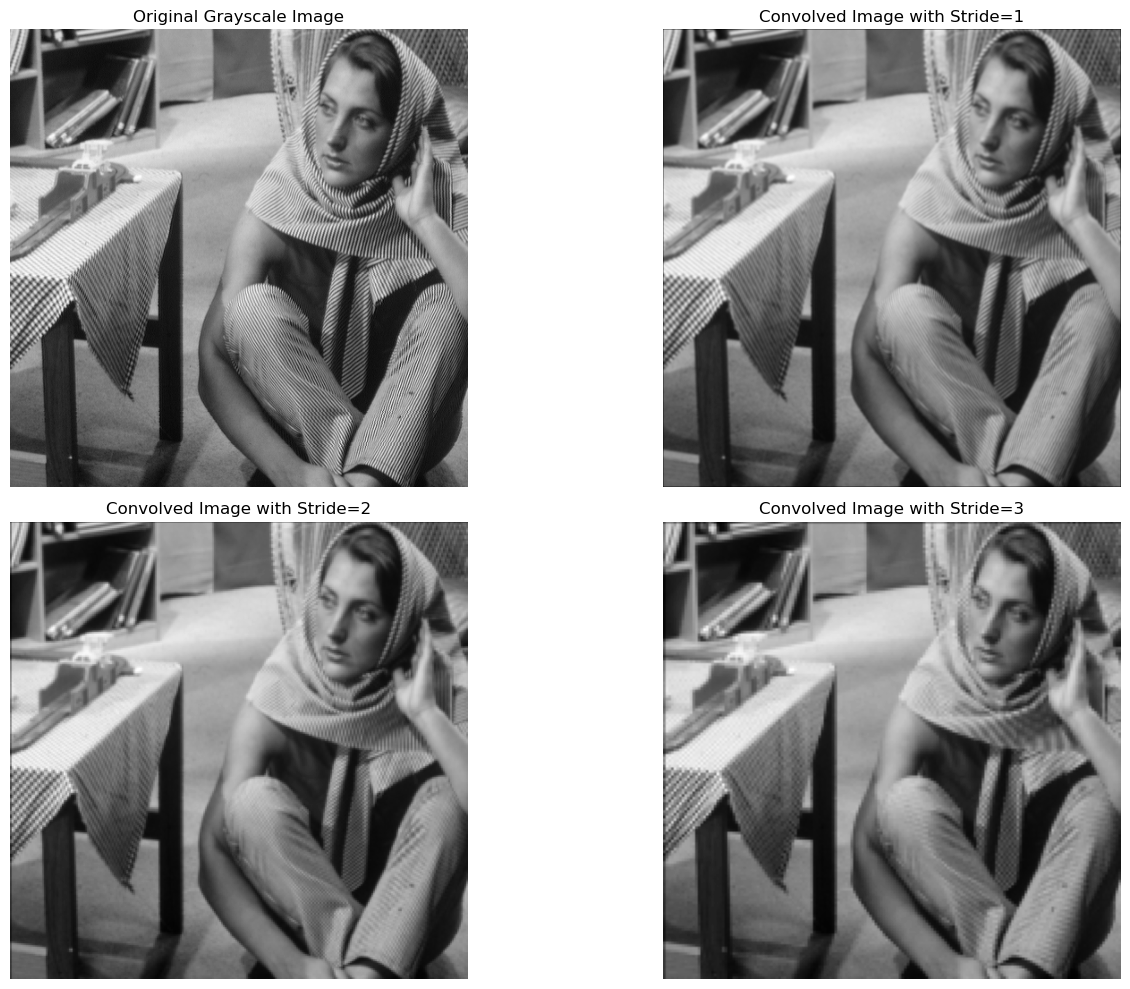

In [32]:
#Problem 3 below:-

# Function for convolution with stride and zero padding, accepting kernel as argument
def convolution_with_stride(image, kernel, stride=2):
    # Get dimensions
    kernel_height, kernel_width = kernel.shape
    padded_height, padded_width = image.shape[0] + kernel_height - 1, image.shape[1] + kernel_width - 1

    # Pad the image with zeros
    padded_image = np.pad(image, ((kernel_height // 2, kernel_height // 2), (kernel_width // 2, kernel_width // 2)), mode='constant')

    # Calculate output dimensions
    output_height = (padded_image.shape[0] - kernel_height) // stride + 1
    output_width = (padded_image.shape[1] - kernel_width) // stride + 1
    output_image = np.zeros((output_height, output_width), dtype=np.float32)

    # Apply convolution with stride
    for i in range(0, output_height):
        for j in range(0, output_width):
            # Extract the region of interest
            region = padded_image[i * stride:i * stride + kernel_height, j * stride:j * stride + kernel_width]
            # Perform the convolution
            output_image[i, j] = np.sum(region * kernel)
    
    return output_image

# Load the image and convert it to grayscale
image = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)  # Replace with your image path

# Define a 3x3 averaging filter (kernel)
kernel = np.ones((3, 3), dtype=np.float32) / 9.0

# Apply the convolution with different strides
smoothed_image_stride_1 = convolution_with_stride(image, kernel, stride=1)
smoothed_image_stride_2 = convolution_with_stride(image, kernel, stride=2)
smoothed_image_stride_3 = convolution_with_stride(image, kernel, stride=3)

# Display the original and convolved images
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(smoothed_image_stride_1, cmap='gray')
plt.title("Convolved Image with Stride=1")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(smoothed_image_stride_2, cmap='gray')
plt.title("Convolved Image with Stride=2")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(smoothed_image_stride_3, cmap='gray')
plt.title("Convolved Image with Stride=3")
plt.axis('off')

plt.tight_layout()
plt.show()


# Problem 4
# Compute and apply a Gaussian Smoothing Filter
• <b>Task: </b>Compute an arbitrary size 2D Gaussian filter using the 2D Gaussian function. Print the Gaussian kernel. Apply the kernel ot a grayscale image and display the result. Determine what the maximum allowed standard deviation (stdv) should be for a 5x5 filter, and explain your reasoning. <br>
• <b>Hints:</b><br>
• Write a gaussian _kernel(size, sigma) function to generate the Gaussian kernel.<br>
• Apply the kernel using cv2. filter2D

Gaussian Kernel (5x5): 
 [[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


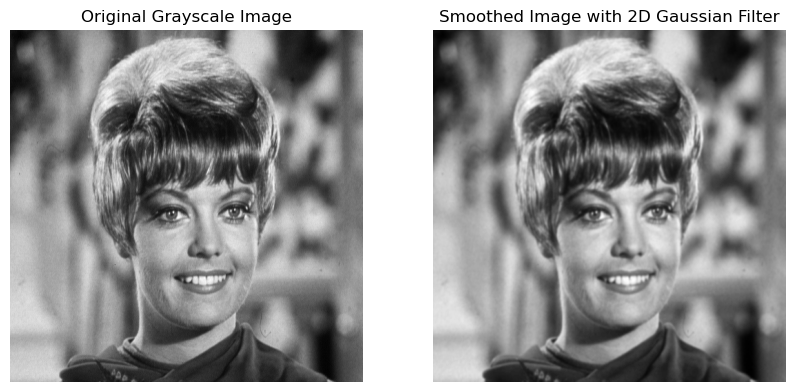

In [33]:
#Problem 4 below:-

# Function to generate a 2D Gaussian kernel
def gaussian_kernel(size, sigma):
    # Create a grid of (x,y) coordinates
    x = np.linspace(-size // 2 + 1, size // 2, size)
    y = np.linspace(-size // 2 + 1, size // 2, size)
    x, y = np.meshgrid(x, y)
    
    # Calculate the 2D Gaussian function
    kernel = (1/(2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Normalize the kernel to ensure the sum is 1
    kernel /= np.sum(kernel)
    
    return kernel

# Load the image and convert it to grayscale
image = cv2.imread('zelda.png', cv2.IMREAD_GRAYSCALE)  # Replace with your image path

# Generate and display the 2D Gaussian kernel
kernel_size = 5  # 5x5 kernel
sigma = 1.0  # Standard deviation for the Gaussian
gaussian_kernel_2d = gaussian_kernel(kernel_size, sigma)
print("Gaussian Kernel (5x5): \n", gaussian_kernel_2d)

# Apply the Gaussian filter to the image using OpenCV's filter2D
smoothed_image = cv2.filter2D(image, -1, gaussian_kernel_2d)

# Display the original and smoothed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title("Smoothed Image with 2D Gaussian Filter")
plt.axis('off')

plt.show()


# Explanation for problem 4
The standard deviation of a 5x5 kernel, which has a pixel size of 5, should be minimal enough to prevent the majority of kernel values from rapidly decaying to zero, so properly capturing the Gaussian distribution. The standard deviation of a 5x5 kernel, should be small so that to prevent most of the kernel values from rapidly decaying to zero, and to properly capture the Gaussian distribution.  <br> Thus, Setting 𝜎 to a maximum of 2.0 is a good option as it will maintain most of the kernel values within the range that permits significant smoothing.
Furthermore, 

# Problem 5
# Gaussian Pyramid Construction
• <b>Task:</b> Compute a Gaussian pyramid for an input image and display the pyramid layers. Scale the pyramid layers to the size of the original image for comparison. Report what you observe in the successive pyramid layers.<br>
• <b>Hints:</b><br>
• Use cv2. pyrDown() to create each successive level of the Gaussian pyramid.<br>
• Use cv2. resize() to scale the pyramid layers back to the original image size for
visualization.<br>
• To display multiple images side by side, use matplotlib.pyplo

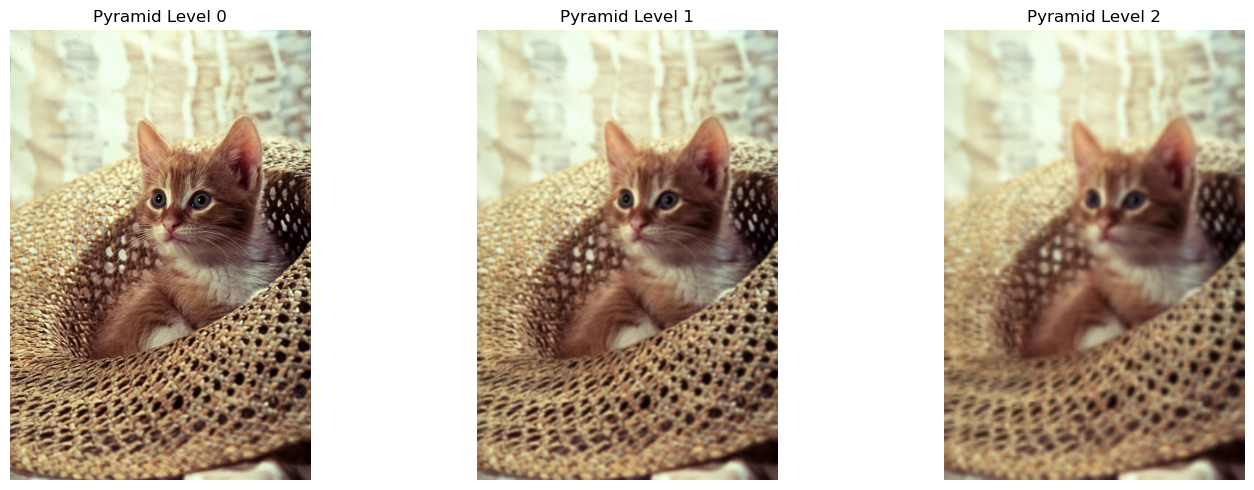

In [34]:
#Problem 5 below:-

# Function to compute the Gaussian pyramid
def gaussian_pyramid(image, levels=3):
    pyramid = [image]  # Initialize the pyramid with the original image
    for _ in range(levels - 1):
        image = cv2.pyrDown(image)  # Downsample the image
        pyramid.append(image)  # Add the downsampled image to the pyramid
    return pyramid

# Load the image
image = cv2.imread('cat.png')  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display

# Compute the Gaussian pyramid
pyramid_layers = gaussian_pyramid(image)

# Resize pyramid layers back to the original image size for visualization
resized_pyramid_layers = [cv2.resize(layer, (image.shape[1], image.shape[0])) for layer in pyramid_layers]

# Display the results
plt.figure(figsize=(15, 5))
for i, layer in enumerate(resized_pyramid_layers):
    plt.subplot(1, len(resized_pyramid_layers), i + 1)
    plt.imshow(layer)
    plt.title(f"Pyramid Level {i}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Problem 6
# Image Gradients and Histogram of Gradient Directions
• <b>Task:</b> Compute and display the image gradients for a given grayscale test image. Display gradients only above a certain magnitude. Then, compute and plot a histogram of the gradient directions. Use simple test images (e.g., square or circle) to verify the correctness of your implementation.<br>
• <b>Hints:</b><br>
• Use the Sobel operator with cv2. Sobel() to compute the gradients in the x and y directions.<br>
• Calculate the gradient magnitude using numpy.sqrt() .<br>
• Compute the gradient direction using numpy.arctan2() .<br>
• Use OpenCV's cv2.arrowedLine() to draw gradient vectors (arrows) on the image. • Use matplotlib.pyplot.hist() to plot the histogram of gradient directions.

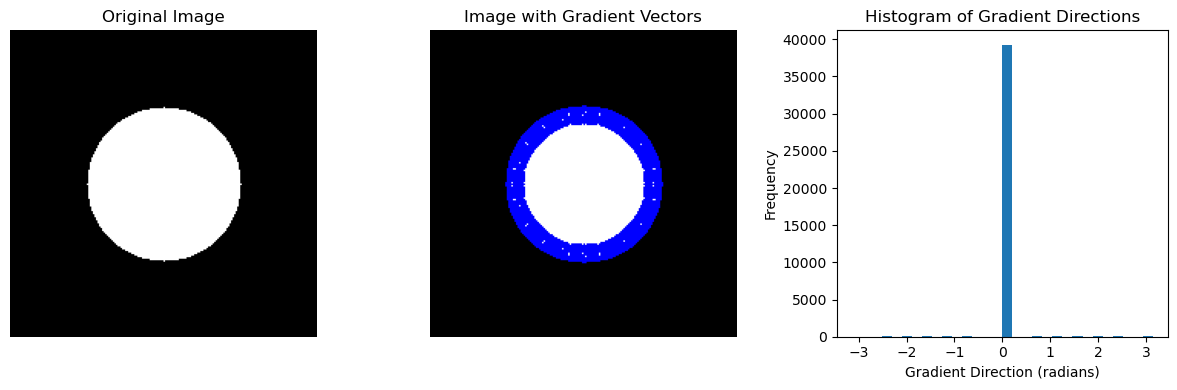

In [39]:
#Problem 6 below:-

image = np.zeros((200, 200), dtype=np.uint8)
cv2.circle(image, (100, 100), 50, 255, -1) 

# Compute gradients
grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
magnitude = np.sqrt(grad_x**2 + grad_y**2)
direction = np.arctan2(grad_y, grad_x)

# Draw gradient vectors
image_with_vectors = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
threshold = 50  # Adjust this threshold as needed
strong_magnitudes = magnitude > threshold
y_coords, x_coords = np.where(strong_magnitudes)

# Draw gradient vectors (arrows) on the image
for y, x in zip(y_coords, x_coords):
    dx = int(grad_x[y, x] / magnitude[y, x] * 10)
    dy = int(grad_y[y, x] / magnitude[y, x] * 10)
    start_point = (x, y)
    end_point = (x + dx, y + dy)
    cv2.arrowedLine(image_with_vectors, start_point, end_point, (0, 0, 255), 1, tipLength=0.3)

# Display the results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(132)
plt.imshow(image_with_vectors)
plt.title("Image with Gradient Vectors")
plt.axis('off')

plt.subplot(133)
plt.hist(direction.ravel(), bins=30, range=(-np.pi, np.pi))
plt.title("Histogram of Gradient Directions")
plt.xlabel("Gradient Direction (radians)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# Problem 7
# Gaussian Derivatives Gradients
• <b>Task:</b> Implement separable Gaussian derivative convolution filters to compute the xand y derivatives of an image. For x derivatives, first, convolve the image with a horizontal
Gaussian derivative filter ni the x direction, and then convolve ti with a vertical Gaussian smoothing filter in the y direction. For y derivatives, first, convolve the image with a vertical Gaussian derivative filter ni the y direction, and then convolve ti with a horizontal Gaussian smoothing filter in the x direction. Display the x and y derivatives of the image as two separate images.<br>
• <b>Hints:</b><br>
• Define gaussian_1d and gaussian_derivative_1d functions.<br>
• Use NumPy's reshape function to reshape them to be horizontal or vertical.<br>
• Use cv2. filter2D() to apply these filters to the image. 

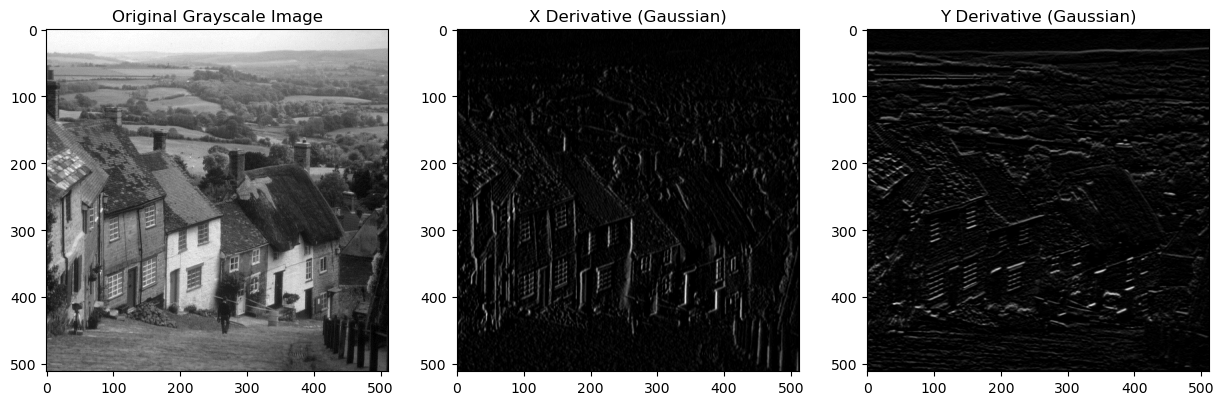

In [36]:
#Problem 7 below:-

# Function to generate a 1D Gaussian kernel
def gaussian_1d(size, sigma):
    ax = np.arange(-size // 2 + 1, size // 2 + 1)
    kernel = np.exp(-(ax**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

# Function to generate a 1D Gaussian derivative kernel
def gaussian_derivative_1d(size, sigma):
    ax = np.arange(-size // 2 + 1, size // 2 + 1)
    kernel = -ax * np.exp(-(ax**2) / (2 * sigma**2))
    return kernel / np.sum(np.abs(kernel))

# Define parameters for Gaussian filters
kernel_size = 5
sigma = 1.0

# Compute 1D filters
gaussian_x = gaussian_1d(kernel_size, sigma).reshape(1, -1)
gaussian_y = gaussian_1d(kernel_size, sigma).reshape(-1, 1)
gaussian_derivative_x = gaussian_derivative_1d(kernel_size, sigma).reshape(1, -1)
gaussian_derivative_y = gaussian_derivative_1d(kernel_size, sigma).reshape(-1, 1)

# Load the image and convert it to grayscale
image = cv2.imread('goldhill.bmp', cv2.IMREAD_GRAYSCALE)

if image is None:
    print(f"Error: Unable to load image from {image_path}. Please check the file path and ensure the image exists.")
else:
    # Detect X derivative (Separable convolution)
    image_x_derivative = cv2.filter2D(image, -1, gaussian_derivative_x)
    image_x_derivative = cv2.filter2D(image_x_derivative, -1, gaussian_y)

    # Detect Y derivative (Separable convolution)
    image_y_derivative = cv2.filter2D(image, -1, gaussian_derivative_y)
    image_y_derivative = cv2.filter2D(image_y_derivative, -1, gaussian_x)

    # Display the results
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Grayscale Image")
    
    plt.subplot(1, 3, 2)
    plt.imshow(image_x_derivative, cmap='gray')
    plt.title("X Derivative (Gaussian)")
    
    plt.subplot(1, 3, 3)
    plt.imshow(image_y_derivative, cmap='gray')
    plt.title("Y Derivative (Gaussian)")
    
    plt.show()


# Problem 8
# Laplacian of Gaussian (LoG) Filtering
• <b>Task:</b> Filter an image using a Laplacian of Gaussian (LoG) filter. Display the zero crossings of the LoG to detect edges. Demonstrate the correctness of the method with test images.<br>
• <b>Hints:</b><br>
• Compute a Laplacian of Gaussian filter by computing the Laplacian of a Gaussian function and samplig it, or by convolving a discrete Gaussian filter with a discrete 3x3 Laplacian filter.<br>
• Use cv2. filter2D() to apply these filters to the image.<br>
• To detect zero-crossings in the LOG image, convert it to a binary image (0 for non-
positive and 1 for positive values), then detect transitions between 0 and 1.

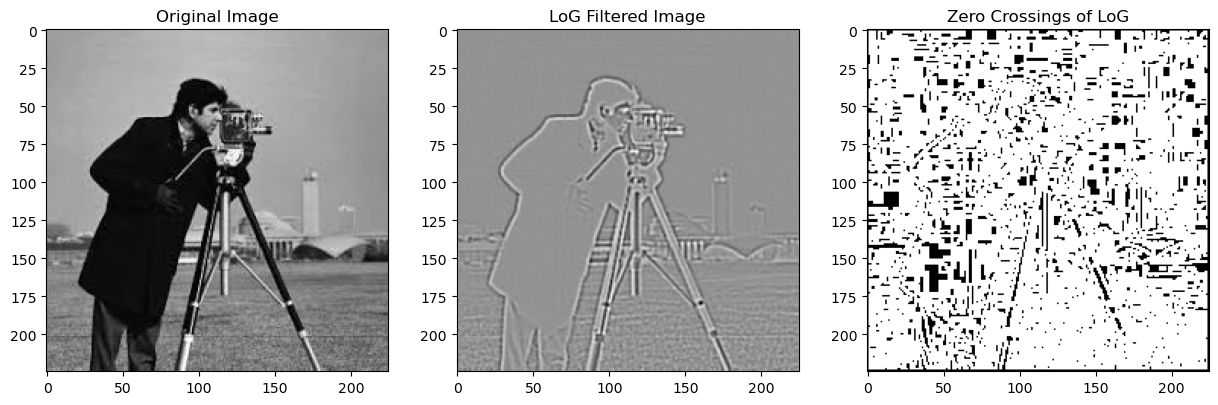

In [37]:
#Problem 8 below:-

# Function to create a Laplacian of Gaussian filter
def laplacian_of_gaussian(size, sigma):
    ax = np.arange(-size // 2 + 1, size // 2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    # Compute the Laplacian of Gaussian
    norm = (xx**2 + yy**2 - 2 * sigma**2) / (sigma**4)
    kernel = norm * np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel -= kernel.mean()  
    return kernel

# Apply the LoG filter to the image
def apply_log(image, size, sigma):
    log_filter = laplacian_of_gaussian(size, sigma)
    log_filtered_image = cv2.filter2D(image, cv2.CV_64F, log_filter)
    return log_filtered_image

# Detect zero crossings
def detect_zero_crossings(log_image):
    zero_crossings = np.zeros_like(log_image, dtype=np.uint8)
    rows, cols = log_image.shape
    
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            patch = log_image[i-1:i+2, j-1:j+2]
            if np.min(patch) < 0 < np.max(patch):
                zero_crossings[i, j] = 255

    return zero_crossings

# Load the image and convert it to grayscale
image = cv2.imread('cameraman.jpeg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print(f"Error: Unable to load image. Please check the file path and ensure the image exists.")
else:
    # Apply Laplacian of Gaussian (LoG)
    size = 5  # Filter size
    sigma = 1.0  # Standard deviation
    log_filtered_image = apply_log(image, size, sigma)
    zero_crossings = detect_zero_crossings(log_filtered_image)

    # Display the original image, LoG-filtered image, and zero crossings
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.subplot(1, 3, 2)
    plt.imshow(log_filtered_image, cmap='gray')
    plt.title("LoG Filtered Image")
    plt.subplot(1, 3, 3)
    plt.imshow(zero_crossings, cmap='gray')
    plt.title("Zero Crossings of LoG") 
    plt.show()
